In [1]:
%%bash
# Do not change or modify this file
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=6dc2a0781cc034e68f99d2cd5f3587a3adf456c00e57410ce1cc8fa5f0960cf3
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# All data files shall be located in the following directory on 
# your google drive: /content/drive/My Drive/ist718_data/data_groupN

# The following provides 2 example file names and their full path names.  This example assumes the assigned
# group name is group12.  The definitions in this cell must be used to load all data files.
# This is only an example, change these definitions to match your file names.
train_csv = '/content/drive/My Drive/ist718_data/data_group5/train.csv'

In [4]:
# The third code cell of your notebook must contain code to mount your google drive and load the data files
from google.colab import drive
drive.mount('/content/drive')

# You must use the definitions above to load your data.
train = pd.read_csv(train_csv)

Mounted at /content/drive


### EDA & Data Visualization

In [5]:
#check for dataset dimension
train.shape

(381109, 12)

In [6]:
#check for missing values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
#check for descriptive stats
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the Dependent Variable')

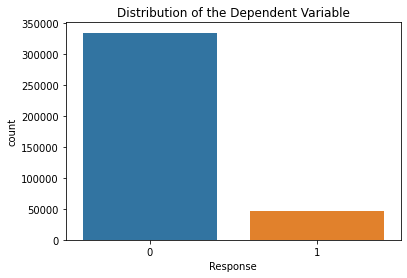

In [8]:
#plot the distribution of the target variable Response
sns.countplot(train.Response).set_title('Distribution of the Dependent Variable')

Text(0.5, 0.98, 'Barplot of Distribution of Dependent Variable by Previously Insured')

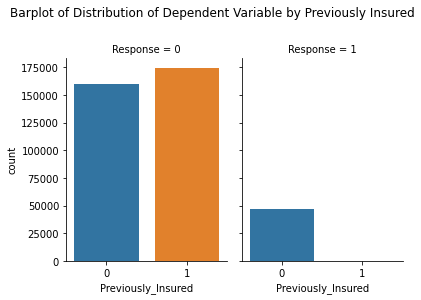

In [9]:
#plot the distribution of Response variable by Previously Insured
temp_df=train.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Previously_Insured", y="count",col="Response",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of Distribution of Dependent Variable by Previously Insured') 

Text(0.5, 0.98, 'Barplot of Distribution of Dependent Variable by Gender')

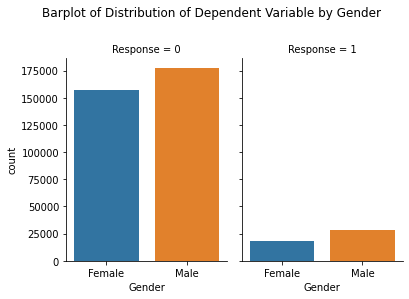

In [10]:
#plot the distribution of Response variable by gender
temp_df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of Distribution of Dependent Variable by Gender') 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

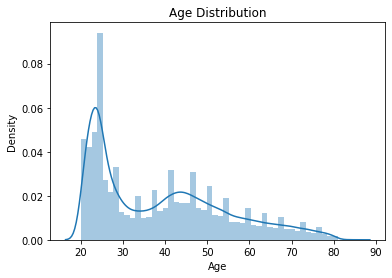

In [11]:
#check for age distribution
sns.distplot(train.Age).set_title('Age Distribution')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


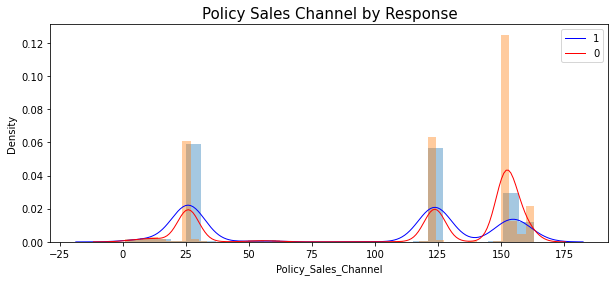

In [12]:
#check relationship between Response variable and Policy Sales Channel
temp_df = train
plt.figure(figsize = (10, 4))
sns.distplot(temp_df.loc[(temp_df['Response'] == 1), 'Policy_Sales_Channel'], kde_kws = {"color": "b", "lw": 1, "label": "1"})
sns.distplot(temp_df.loc[(temp_df['Response'] == 0), 'Policy_Sales_Channel'], kde_kws = {"color": "r", "lw": 1, "label": "0"})
plt.title('Policy Sales Channel by Response', fontsize = 15)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Region Distribution')

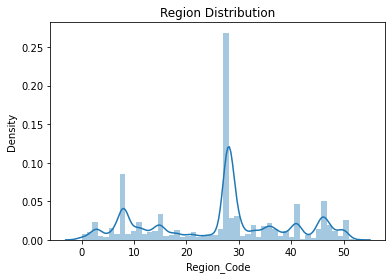

In [13]:
#check for region distribution
sns.distplot(train.Region_Code).set_title('Region Distribution')

Text(0.5, 1.0, 'Barplot of Driving License by Gender')

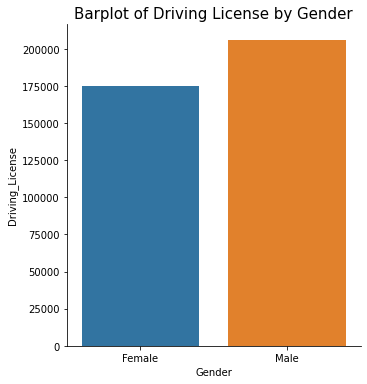

In [14]:
#distribution of Driving License variable by gender
temp_df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=temp_df, kind="bar")
plt.title('Barplot of Driving License by Gender', fontsize = 15)

Text(0.5, 0.98, 'Distribution of Previously Insured by Vehicle Damage')

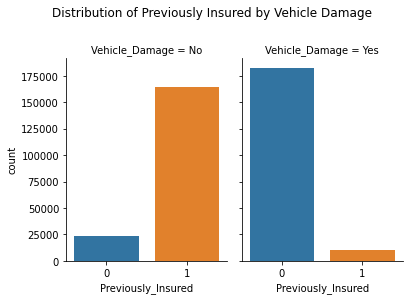

In [15]:
#distribution of Previously Insured variable by Vehicle Damage
temp_df=train.groupby(['Vehicle_Damage','Previously_Insured'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Previously_Insured", y="count",col="Vehicle_Damage",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Previously Insured by Vehicle Damage') 

In [16]:
#encode categorical variables into numerical and apply changes to a temporary dataframe
temp_data = train
Gender = {'Male': 0, 'Female': 1}
Driving_License = {0: 0, 1: 1}
Previously_Insured = {0: 1, 1: 0}
Vehicle_Age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
Vehicle_Damage = {'Yes': 1, 'No': 0}

#apply changes to temp dataframe
temp_data['Gender'] = temp_data['Gender'].map(Gender)
temp_data['Driving_License'] = temp_data['Driving_License'].map(Driving_License)
temp_data['Previously_Insured'] = temp_data['Previously_Insured'].map(Previously_Insured)
temp_data['Vehicle_Age'] = temp_data['Vehicle_Age'].map(Vehicle_Age)
temp_data['Vehicle_Damage'] = temp_data['Vehicle_Damage'].map(Vehicle_Damage)

temp_data['Policy_Sales_Channel'] = temp_data['Policy_Sales_Channel'].apply(lambda x: np.int(x))
temp_data['Region_Code'] = temp_data['Region_Code'].apply(lambda x: np.int(x))

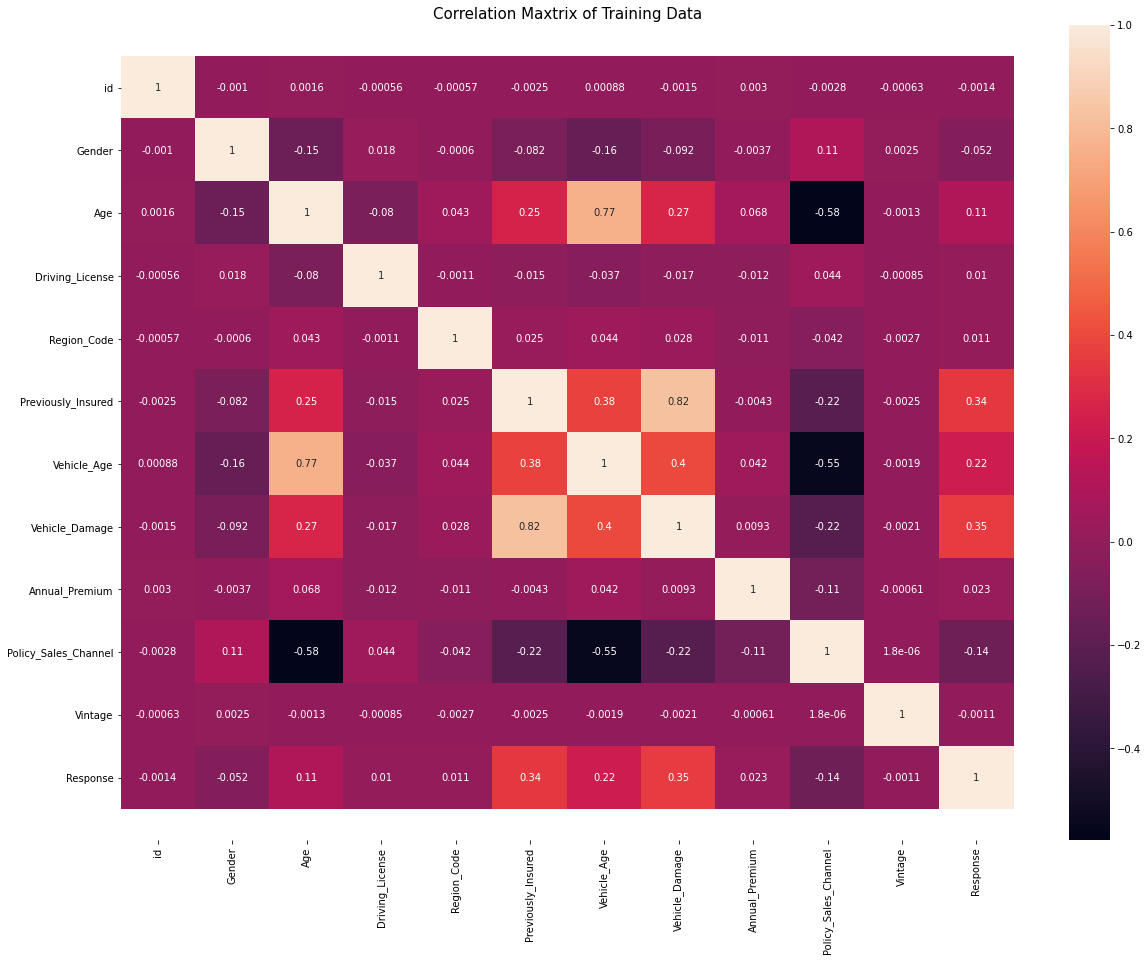

In [17]:
#check for correlation matrix
corrMatrix = temp_data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corrMatrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Maxtrix of Training Data', fontsize = 15)
plt.show()

In [18]:
#check for distribution of the Driving License variable
print("Percentage of Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)

Percentage of Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


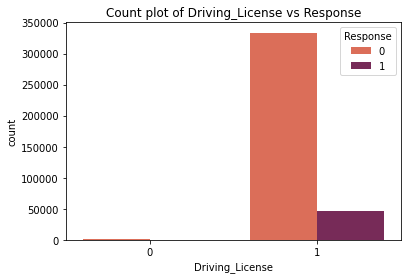

In [19]:
#count the number of response based on Driving License
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
#axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
#sns.countplot(train['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',data = train,palette="rocket_r")

Text(0.5, 0.98, 'Barplot of Dependent Variable by Vehile Age')

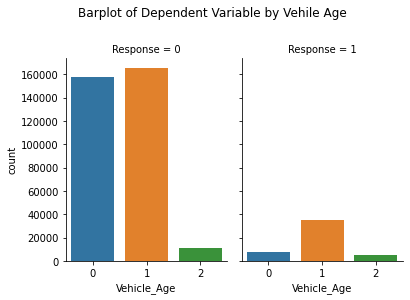

In [20]:
##plot distribution of the Response variable by Vehile Age
temp_df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of Dependent Variable by Vehile Age') 

In [21]:
#define age variable into different categories
ages = train['Age']
bins = [19, 30, 50, 90]
labels = ['Young', 'Middle Age', 'Elderly']
train['Age_bracket'] = pd.cut(ages, bins, labels = labels,include_lowest = True)

Text(0.5, 0.98, 'Barplot of Dependent Variable by Age Group')

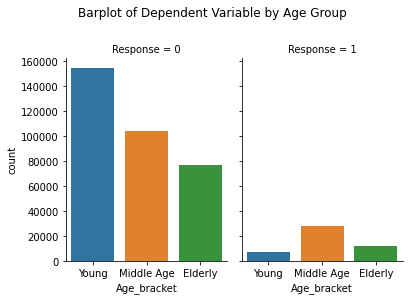

In [22]:
#distribution of the Response variable by age group
temp_df=train.groupby(['Age_bracket','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Age_bracket", y="count",col="Response",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of Dependent Variable by Age Group') 

In [23]:
#define Vintage variable into different categories by using quartiles
loyalty = train['Vintage']
bins = [0, 82, 154, 227, 300]
labels = ['q1', 'q2', 'q3','q4']
train['loyalty_bracket'] = pd.cut(loyalty, bins, labels = labels,include_lowest = True)

Text(0.5, 0.98, 'Barplot of Dependent Variable by Vintage')

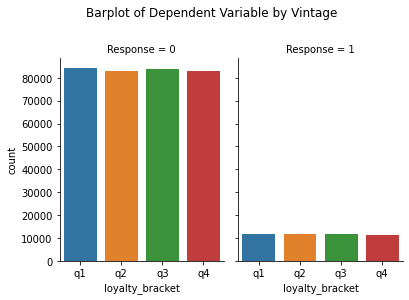

In [24]:
#distribution of the Response variable by Vintage
temp_df=train.groupby(['loyalty_bracket','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="loyalty_bracket", y="count",col="Response",
                data=temp_df, kind="bar",
                height=4, aspect=.7);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot of Dependent Variable by Vintage')